# Mineração de Dados

Conjunto de dados: 
Diamonds Prices

https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

Marcos Geraldo Braga Emiliano
19.1.4012


## Contexto geral dos dados: Dados relativos a 53,940 diamantes de corte redondo negociados em 2022, onde são descritas 10 caracteristicas sobre eles, carat, cut, color, clarity, depth, table, price, x, y, e z, descrição detalhada a frente. 

## Carregando os dados:

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import pylab as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline


Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/My Drive/TPDataMining/DiamondsPrices2022.csv')

data.shape

(53943, 11)

Removendo uma coluna com valores de indice

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
numData = data.select_dtypes('number')
catData = data.select_dtypes('O')
for c in catData.columns:
    print(catData[c].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [5]:
instances, features = data.shape

### Pequeno Exemplo:

In [6]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# Descrição dos Atributos:

## 1) index - indice numerico que indentifica a entidade, dado Discreto

## 2) carat - quilate, unidade de medida baseada no peso, dado Continuo 

## 3) cut - classificação do corte da pedra preciosa, dado categorico

## 4) color - cor da pedra, dado categorico

## 5) clarity - clareza da pedra, dado categorico

## 6) depth - "altura" da pedra, continuo

## 7) table - "largura" do topo da pedra, continuo

## 8) price - preço da pedra em dolar, continuo

## 9) x - medida no eixo x da pedra em mm, continuo

## 10) y - medida no eixo y da pedra em mm, continuo

## 11) z - medida no eixo z da pedra em mm, continuo

## Avaliando os valores contidos no banco de dados:

### Quilate

In [7]:
min = np.min(data['carat'])
max = np.max(data['carat'])
media = sum(data['carat'])/instances
desv= math.sqrt(np.sum((data['carat']-media)**2)/instances)
inter=max-min
out=[]

print("Carat:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Carat:
Minimo:  0.2
Maximo:  5.01
Media:  0.7979346717831621
Desvio Padrao:  0.4739941595630074
Intervalo:  4.81


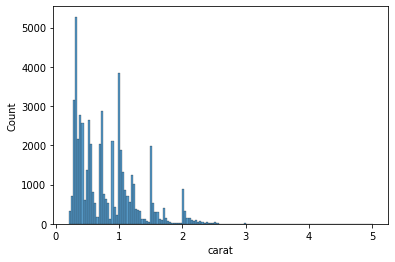

In [8]:
sns.histplot(numData['carat'].sort_values())

### "Altura"

In [9]:
min = np.min(data['depth'])
max = np.max(data['depth'])
media = sum(data['depth'])/instances
desv= math.sqrt(np.sum((data['depth']-media)**2)/instances)
inter=max-min
out=[]

print("Depth:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Depth:
Minimo:  43.0
Maximo:  79.0
Media:  61.74932243293768
Desvio Padrao:  1.4326129869036368
Intervalo:  36.0


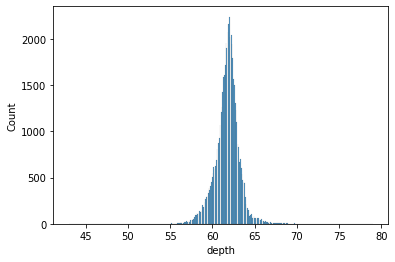

In [10]:
sns.histplot(numData['depth'].sort_values())

### "Largura"

In [11]:
min = np.min(data['table'])
max = np.max(data['table'])
media = sum(data['table'])/instances
desv= math.sqrt(np.sum((data['table']-media)**2)/instances)
inter=max-min
out=[]

print("Table:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Table:
Minimo:  43.0
Maximo:  95.0
Media:  57.45725117253402
Desvio Padrao:  2.2345282410474523
Intervalo:  52.0


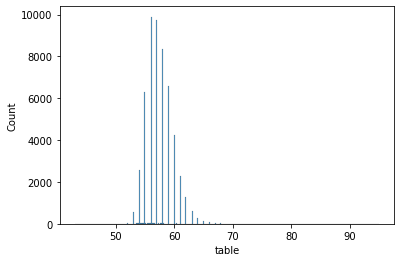

In [12]:
sns.histplot(numData['table'].sort_values())

### "Preço"

In [13]:
min = np.min(data['price'])
max = np.max(data['price'])
media = sum(data['price'])/instances
desv= math.sqrt(np.sum((data['price']-media)**2)/instances)
inter=max-min
out=[]

print("Price:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Price:
Minimo:  326
Maximo:  18823
Media:  3932.734293606214
Desvio Padrao:  3989.301469302266
Intervalo:  18497


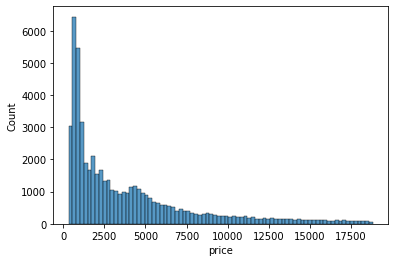

In [14]:
sns.histplot(numData['price'].sort_values())

### Medidas x, y e z

In [15]:
min = np.min(data['x'])
max = np.max(data['x'])
media = sum(data['x'])/instances
desv= math.sqrt(np.sum((data['x']-media)**2)/instances)
inter=max-min
out=[]

print("\nEixo x:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

min = np.min(data['y'])
max = np.max(data['y'])
media = sum(data['y'])/instances
desv= math.sqrt(np.sum((data['y']-media)**2)/instances)
inter=max-min
out=[]

print("\n--------------------\n")

print("Eixo y:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

print("\n--------------------\n")


min = np.min(data['z'])
max = np.max(data['z'])
media = sum(data['z'])/instances
desv= math.sqrt(np.sum((data['z']-media)**2)/instances)
inter=max-min
out=[]

print("Eixo z:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)



Eixo x:
Minimo:  0.0
Maximo:  10.74
Media:  5.731158074263461
Desvio Padrao:  1.121719188381892
Intervalo:  10.74

--------------------

Eixo y:
Minimo:  0.0
Maximo:  58.9
Media:  5.734526444580299
Desvio Padrao:  1.1420923330316735
Intervalo:  58.9

--------------------

Eixo z:
Minimo:  0.0
Maximo:  31.8
Media:  3.5387295849324203
Desvio Padrao:  0.7056729303858117
Intervalo:  31.8


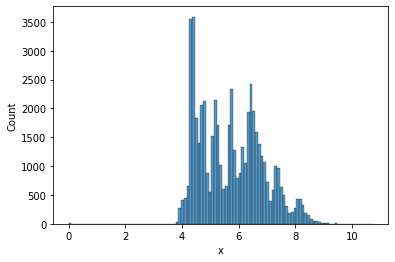

In [16]:
sns.histplot(numData['x'].sort_values())

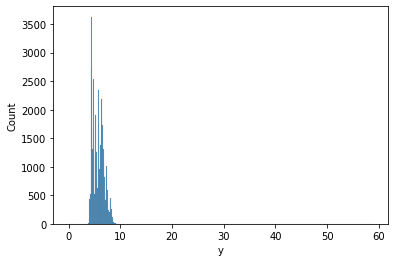

In [17]:
sns.histplot(numData['y'].sort_values())

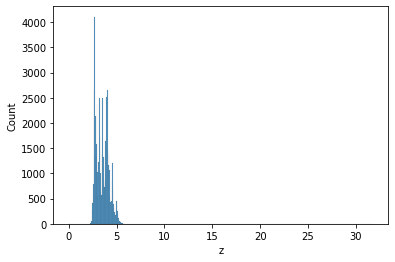

In [18]:
sns.histplot(numData['z'].sort_values())

### Qualidade do Corte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


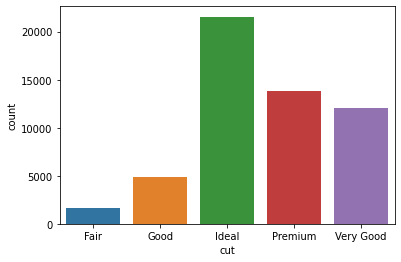

In [19]:
sns.countplot(catData['cut'].sort_values())

### Cor

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


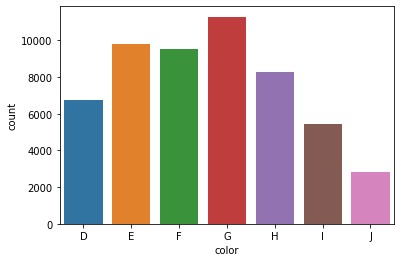

In [20]:
sns.countplot(catData['color'].sort_values())

### Clareza

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


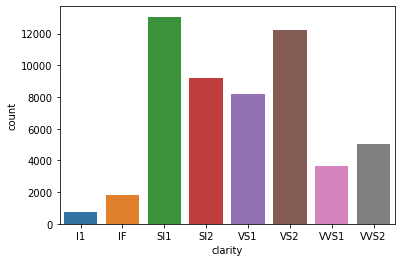

In [21]:
sns.countplot(catData['clarity'].sort_values())

# Limpeza de Dados

In [22]:
print(data.isnull().any())
print()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool



In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Nenhum valor nulo encontrado

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Buscando valores duplicados 

In [25]:
print(f'The number of duplicate rows : {data.duplicated().sum()}') 

The number of duplicate rows : 149


### Buscando Outliers 

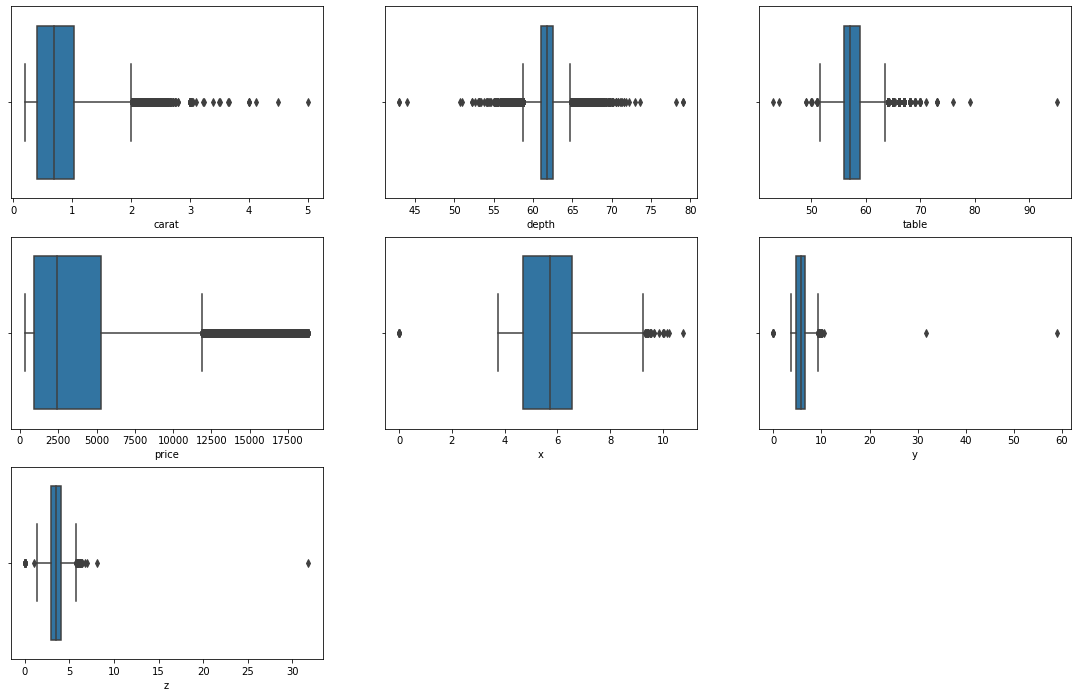

In [26]:
i = 1
plt.figure(figsize=(19, 12))
for c in numData.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

### Fazendo o tratamento dos Outliers 

In [27]:
data = data[(np.abs(stats.zscore(numData)) < 3).all(axis=1)]

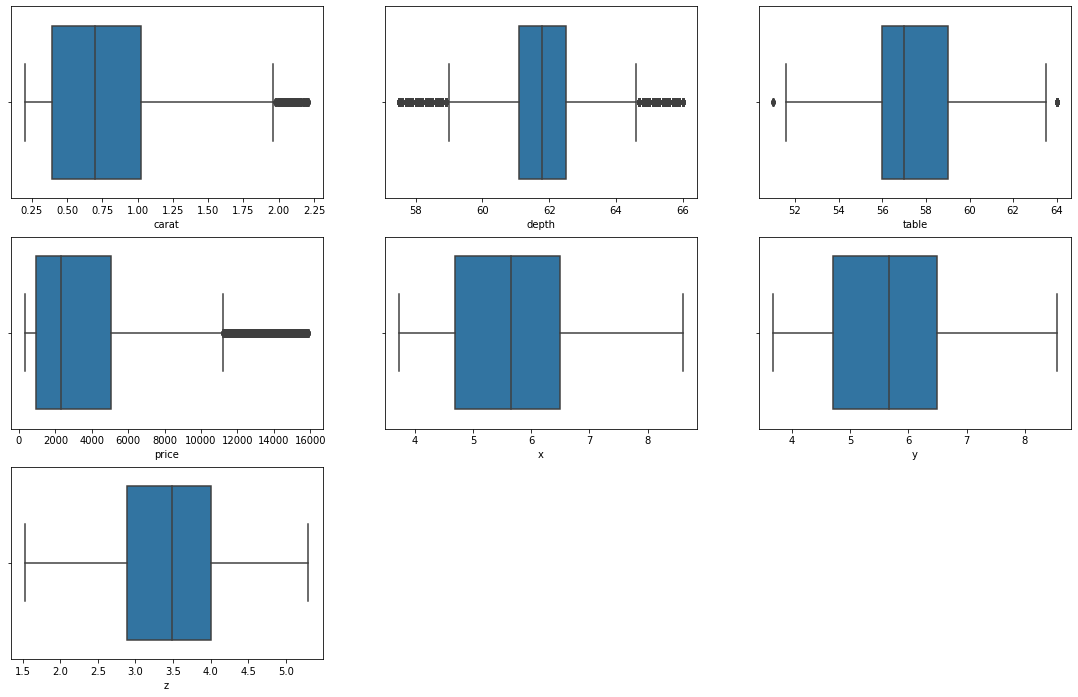

In [28]:
numData = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in numData.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

### Correlação dos demais atributos com o preço

In [29]:
data.corrwith(data.price)

carat    0.922409
depth   -0.001882
table    0.131667
price    1.000000
x        0.890451
y        0.891716
z        0.887339
dtype: float64

In [30]:
data['table_xy'] = (data['table'].mean()*(data['x']*data['y']).mean()-data['table']*(data['x']*data['y']))
data['depth_z'] = (data['depth'].mean()*data['z'].mean()-data['depth']*data['z'])

print("\n",data['table_xy'])
print("\n----------------------------------------------------\n")
print("\n",data['depth_z'])


 0        1036.549639
1         990.011039
3         870.776639
4         806.222639
5        1011.867839
            ...     
53938    -281.799361
53939      18.989139
53940      73.301639
53941    -137.987761
53942     -39.281761
Name: table_xy, Length: 51593, dtype: float64

----------------------------------------------------


 0        66.359088
1        77.666088
3        51.692088
4        41.729088
5        60.060088
           ...    
53938   -12.335912
53939   -10.603912
53940     4.659088
53941    10.690088
53942     5.869088
Name: depth_z, Length: 51593, dtype: float64


### Distribuição de valores

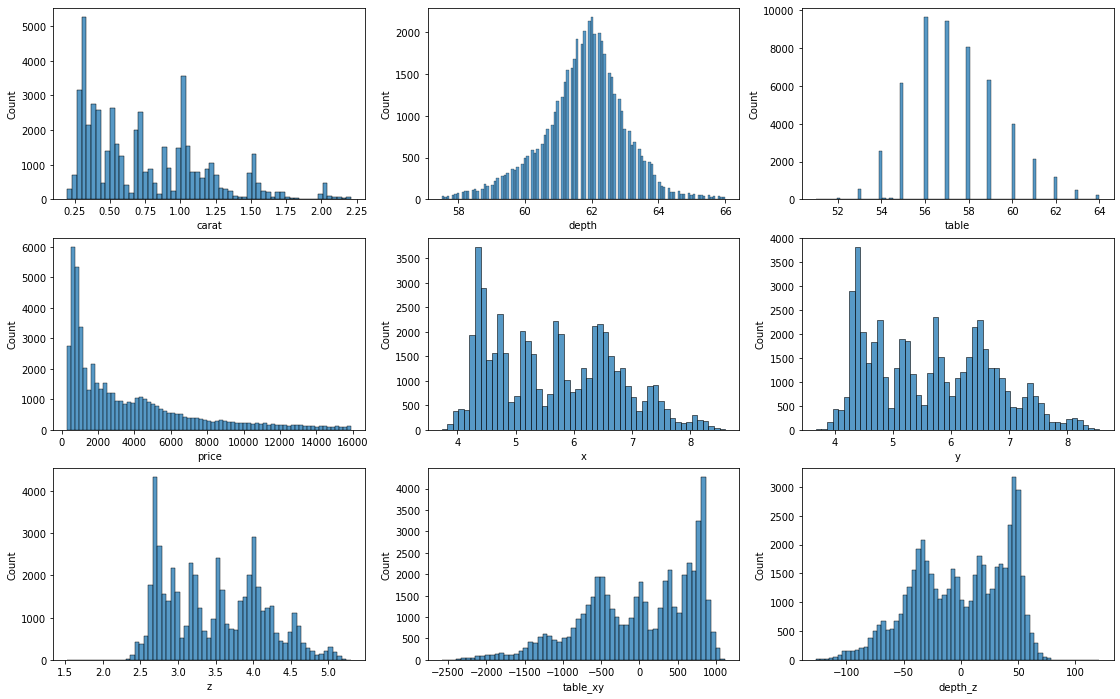

In [31]:
numData = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in numData.columns:
    plt.subplot(3, 3, i)
    sns.histplot(x = data[c])
    i+=1

### Fazendo o tratamento dos atributos categoricos

In [32]:
data['cut'] = data['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
data['color'] = data['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
data['clarity'] = data['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

### Resultado das operações 

In [33]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,table_xy,depth_z
count,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000
mean,0.759929,2.952532,3.433625,3.086950,61.752751,57.369213,3585.983602,5.657861,5.661277,3.494647,-4.925464,-0.074755
std,0.424971,1.070644,1.694679,1.642551,1.269271,2.100094,3436.780058,1.057390,1.050352,0.653032,725.753961,41.023665
min,0.200000,0.000000,0.000000,0.000000,57.500000,51.000000,326.000000,3.730000,3.680000,1.530000,-2583.528161,-126.760912
25%,0.390000,2.000000,2.000000,2.000000,61.100000,56.000000,926.000000,4.690000,4.700000,2.890000,-534.215361,-33.343912
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2304.000000,5.660000,5.660000,3.490000,78.583839,2.668088
75%,1.020000,4.000000,5.000000,4.000000,62.500000,59.000000,5047.000000,6.490000,6.490000,4.010000,652.429639,38.108088
max,2.210000,4.000000,6.000000,7.000000,66.000000,64.000000,15898.000000,8.600000,8.550000,5.300000,1121.466239,121.097088


In [34]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,table_xy,depth_z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,1036.549639,66.359088
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,990.011039,77.666088
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,870.776639,51.692088
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,806.222639,41.729088
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48,1011.867839,60.060088


In [35]:
print(data.sort_values('carat', ascending=False).head(5)['carat'])
print(data.sort_values('carat', ascending=True).head(5)['carat'])

25250    2.21
24072    2.21
24922    2.21
26321    2.21
25506    2.21
Name: carat, dtype: float64
31598    0.2
31591    0.2
31592    0.2
31593    0.2
31594    0.2
Name: carat, dtype: float64


In [36]:
print(data.sort_values('depth', ascending=False).head(5)['depth'])
print(data.sort_values('depth', ascending=True).head(5)['depth'])

2534     66.0
1523     66.0
46742    66.0
15331    66.0
1097     66.0
Name: depth, dtype: float64
5481     57.5
50486    57.5
11639    57.5
34938    57.5
50211    57.5
Name: depth, dtype: float64


In [37]:
print(data.sort_values('table', ascending=False).head(5)['table'])
print(data.sort_values('table', ascending=True).head(5)['table'])

4582     64.0
10570    64.0
20481    64.0
24787    64.0
3595     64.0
Name: table, dtype: float64
46040    51.0
47630    51.0
33586    51.0
3979     51.0
45798    51.0
Name: table, dtype: float64


In [38]:
print(data.sort_values('price', ascending=False).head(5)['price'])
print(data.sort_values('price', ascending=True).head(5)['price'])

26393    15898
26392    15897
26391    15897
26390    15897
26389    15889
Name: price, dtype: int64
0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64


In [39]:
print(data.sort_values('x', ascending=False).head(5)['x'])
print(data.sort_values('x', ascending=True).head(5)['x'])

24739    8.60
22140    8.57
25562    8.57
25749    8.54
23121    8.52
Name: x, dtype: float64
31596    3.73
31600    3.73
31598    3.74
31599    3.76
31601    3.77
Name: x, dtype: float64


In [40]:
print(data.sort_values('y', ascending=False).head(5)['y'])
print(data.sort_values('y', ascending=True).head(5)['y'])

26242    8.55
24739    8.53
25717    8.53
22140    8.53
26223    8.51
Name: y, dtype: float64
31600    3.68
31598    3.71
31596    3.71
31601    3.72
31599    3.73
Name: y, dtype: float64


In [41]:
print(data.sort_values('z', ascending=False).head(5)['z'])
print(data.sort_values('z', ascending=True).head(5)['z'])

23194    5.30
23690    5.23
13118    5.23
25305    5.23
23513    5.23
Name: z, dtype: float64
20694    1.53
39246    2.06
31592    2.24
47138    2.25
31591    2.26
Name: z, dtype: float64


### Tratamento dos dados continuos para intervalos

### Carat

In [42]:
bins=1000
min = np.min(data['carat'])
max = np.max(data['carat'])
inter=max-min
print("\nIntervalo dos Valores:",inter)
gaps=inter/bins
print("\nTamanho das Bins:",gaps)
data['carat'] = data['carat'] //gaps
print("\n",(data.sort_values('carat', ascending=True).head(10)['carat']))
print("\n",(data.sort_values('carat', ascending=False).head(10)['carat']))


Intervalo dos Valores: 2.01

Tamanho das Bins: 0.0020099999999999996

 31598    99.0
31591    99.0
31592    99.0
31593    99.0
31594    99.0
31595    99.0
31596    99.0
31597    99.0
31599    99.0
31600    99.0
Name: carat, dtype: float64

 25250    1099.0
24072    1099.0
24922    1099.0
26321    1099.0
25506    1099.0
25106    1099.0
25306    1099.0
24153    1099.0
25330    1099.0
25089    1099.0
Name: carat, dtype: float64


Depth

In [43]:
bins=1000
min = np.min(data['depth'])
max = np.max(data['depth'])
inter=max-min
print("\nIntervalo dos Valores:",inter)
gaps=inter/bins
print("\nTamanho das Bins:",gaps)
data['depth'] = data['depth'] //gaps
print("\n",(data.sort_values('depth', ascending=True).head(10)['depth']))
print("\n",(data.sort_values('depth', ascending=False).head(10)['depth']))


Intervalo dos Valores: 8.5

Tamanho das Bins: 0.0085

 5481     6764.0
50486    6764.0
11639    6764.0
34938    6764.0
50211    6764.0
34024    6764.0
46085    6764.0
25562    6764.0
12641    6764.0
12692    6764.0
Name: depth, dtype: float64

 2534     7764.0
1523     7764.0
46742    7764.0
15331    7764.0
1097     7764.0
15139    7764.0
17716    7764.0
49151    7764.0
49328    7764.0
3115     7764.0
Name: depth, dtype: float64


### Table

In [44]:
bins=1000
min = np.min(data['table'])
max = np.max(data['table'])
inter=max-min
print("\nIntervalo dos Valores:",inter)
gaps=inter/bins
print("\nTamanho das Bins:",gaps)
data['table'] = data['table'] //gaps
print("\n",(data.sort_values('table', ascending=True).head(10)['table']))
print("\n",(data.sort_values('table', ascending=False).head(10)['table']))


Intervalo dos Valores: 13.0

Tamanho das Bins: 0.013

 46040    3923.0
47630    3923.0
33586    3923.0
3979     3923.0
45798    3923.0
1515     3923.0
26387    3923.0
4150     3923.0
24815    3969.0
5144     4000.0
Name: table, dtype: float64

 4582     4923.0
10570    4923.0
20481    4923.0
24787    4923.0
3595     4923.0
17781    4923.0
13749    4923.0
14861    4923.0
30409    4923.0
19089    4923.0
Name: table, dtype: float64


Price

In [45]:
bins=1000
min = np.min(data['price'])
max = np.max(data['price'])
inter=max-min
print("\nIntervalo dos Valores:",inter)
gaps=inter/bins
print("\nTamanho das Bins:",gaps)
data['price'] = data['price'] //gaps
print("\n",(data.sort_values('price', ascending=True).head(10)['price']))
print("\n",(data.sort_values('price', ascending=False).head(10)['price']))


Intervalo dos Valores: 15572

Tamanho das Bins: 15.572

 0     20.0
1     20.0
11    21.0
10    21.0
9     21.0
8     21.0
12    21.0
6     21.0
5     21.0
4     21.0
Name: price, dtype: float64

 26393    1020.0
26392    1020.0
26391    1020.0
26390    1020.0
26389    1020.0
26387    1020.0
26386    1020.0
26382    1019.0
26383    1019.0
26381    1019.0
Name: price, dtype: float64


X

In [46]:
bins=1000
min = np.min(data['x'])
max = np.max(data['x'])
inter=max-min
print("\nIntervalo dos Valores:",inter)
gaps=inter/bins
print("\nTamanho das Bins:",gaps)
data['x'] = data['x'] //gaps
print("\n",(data.sort_values('x', ascending=True).head(10)['x']))
print("\n",(data.sort_values('x', ascending=False).head(10)['x']))


Intervalo dos Valores: 4.869999999999999

Tamanho das Bins: 0.004869999999999999

 31596    765.0
31600    765.0
31598    767.0
31599    772.0
31601    774.0
31591    778.0
14       778.0
31592    782.0
31593    782.0
31597    782.0
Name: x, dtype: float64

 24739    1765.0
22140    1759.0
25562    1759.0
25749    1753.0
23121    1749.0
22251    1749.0
26242    1747.0
25250    1747.0
24211    1743.0
25717    1741.0
Name: x, dtype: float64


Y

In [47]:
bins=1000
min = np.min(data['y'])
max = np.max(data['y'])
inter=max-min
print("\nIntervalo dos Valores:",inter)
gaps=inter/bins
print("\nTamanho das Bins:",gaps)
data['y'] = data['y'] //gaps
print("\n",(data.sort_values('y', ascending=True).head(10)['y']))
print("\n",(data.sort_values('y', ascending=False).head(10)['y']))


Intervalo dos Valores: 4.870000000000001

Tamanho das Bins: 0.004870000000000001

 31600    755.0
31598    761.0
31596    761.0
31601    763.0
31599    765.0
14       770.0
31591    774.0
31597    774.0
31593    776.0
38276    776.0
Name: y, dtype: float64

 26242    1755.0
24739    1751.0
25717    1751.0
22140    1751.0
26223    1747.0
22251    1745.0
25749    1743.0
26133    1743.0
25562    1741.0
26321    1741.0
Name: y, dtype: float64


Z

In [48]:
bins=1000
min = np.min(data['z'])
max = np.max(data['z'])
inter=max-min
print(inter)
gaps=inter/bins
print(gaps)
data['z'] = data['z'] //gaps
print((data.sort_values('z', ascending=True).head(10)['z']))
print((data.sort_values('z', ascending=False).head(10)['z']))

3.7699999999999996
0.0037699999999999995
20694    405.0
39246    546.0
31592    594.0
47138    596.0
31591    599.0
14       602.0
31594    604.0
38278    607.0
31595    610.0
38279    610.0
Name: z, dtype: float64
23194    1405.0
23690    1387.0
13118    1387.0
25305    1387.0
23513    1387.0
24536    1387.0
24396    1384.0
24857    1384.0
25225    1384.0
23841    1381.0
Name: z, dtype: float64


### Relação entre o preço e os demais atributos

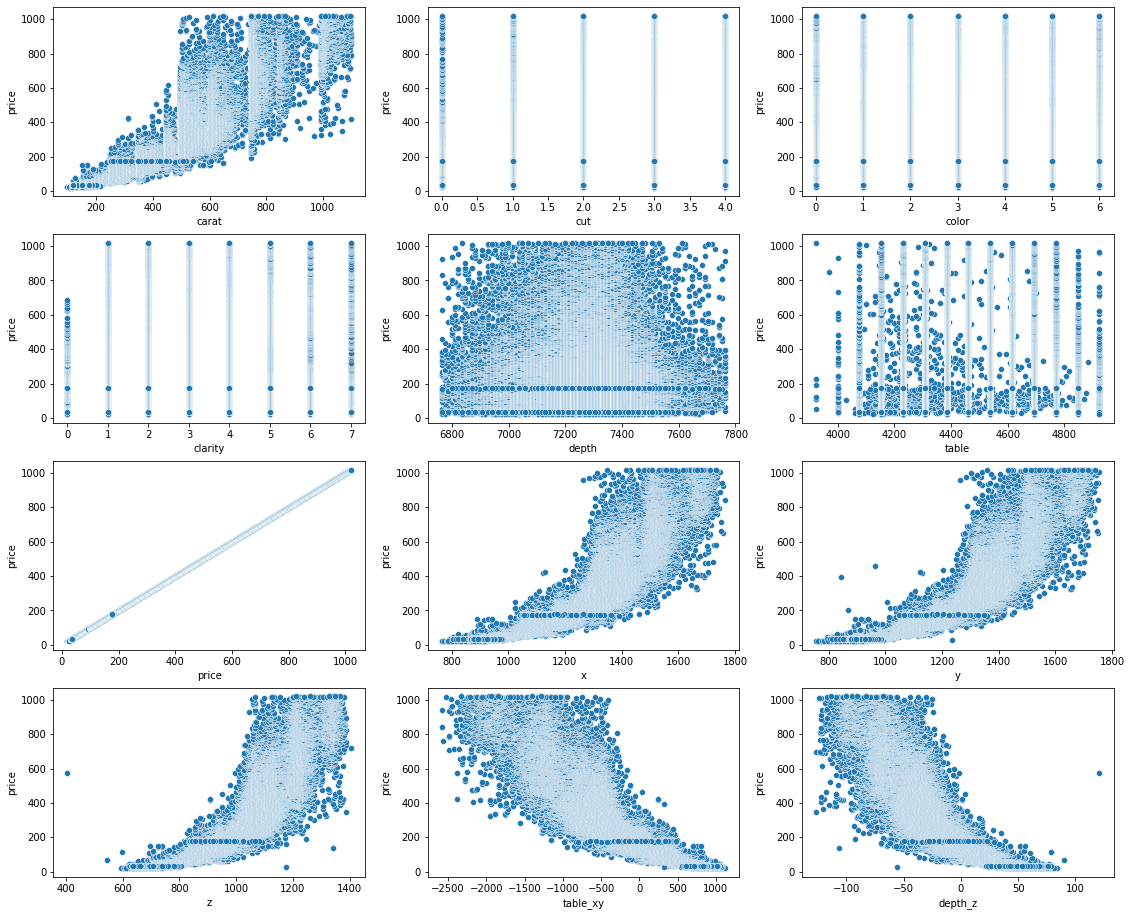

In [49]:
i = 1
plt.figure(figsize=(19, 16))
for c in data.columns:
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[c], y=data['price'])
    i+=1

# Inicio da Fase 2

In [50]:
data.head

<bound method NDFrame.head of        carat  cut  color  clarity   depth   table  price       x       y  \
0      114.0    4      5        1  7235.0  4230.0   20.0   811.0   817.0   
1      104.0    3      5        2  7035.0  4692.0   20.0   798.0   788.0   
3      144.0    3      1        3  7341.0  4461.0   21.0   862.0   868.0   
4      154.0    1      0        1  7447.0  4461.0   21.0   891.0   893.0   
5      119.0    2      0        5  7388.0  4384.0   21.0   809.0   813.0   
...      ...  ...    ...      ...     ...     ...    ...     ...     ...   
53938  427.0    3      2        1  7176.0  4461.0  177.0  1262.0  1256.0   
53939  373.0    4      6        1  7317.0  4230.0  177.0  1197.0  1205.0   
53940  353.0    3      5        2  7117.0  4230.0  176.0  1188.0  1178.0   
53941  353.0    3      4        2  7035.0  4769.0  176.0  1178.0  1176.0   
53942  348.0    2      5        3  7117.0  4538.0  177.0  1172.0  1182.0   

           z     table_xy    depth_z  
0      644.0  1036

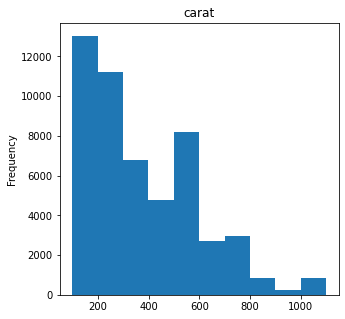

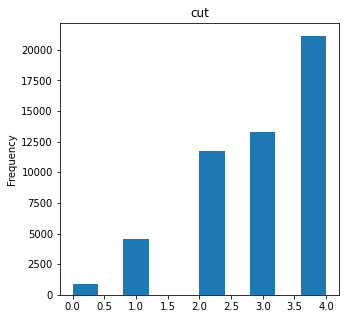

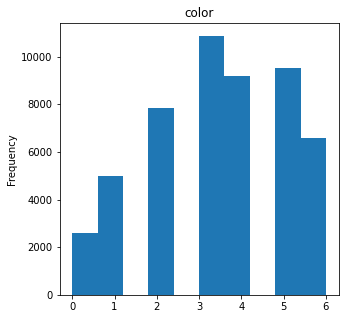

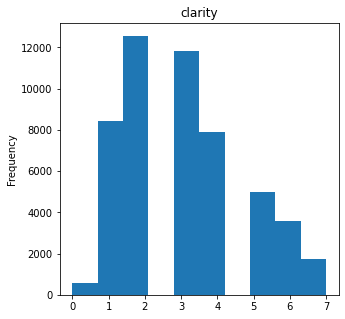

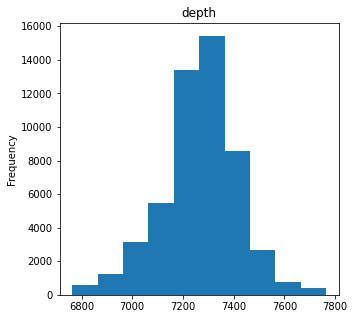

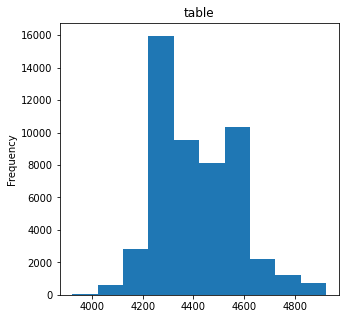

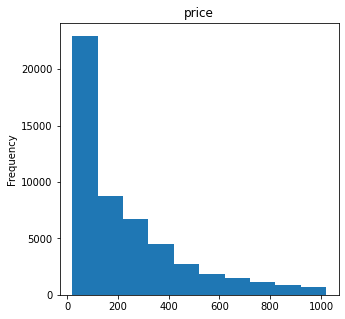

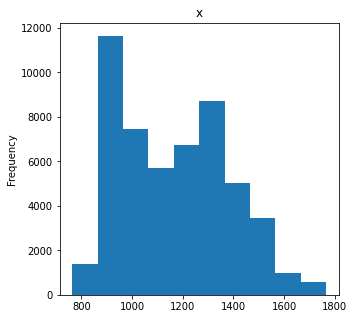

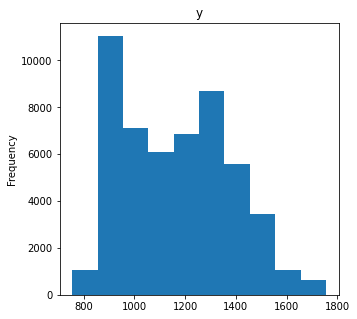

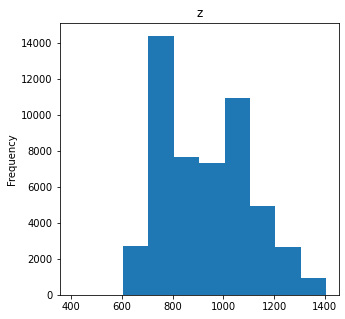

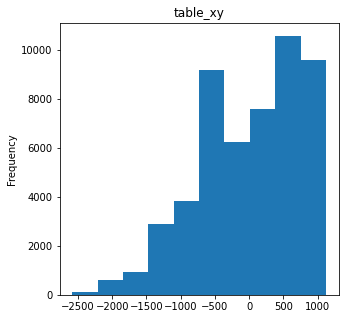

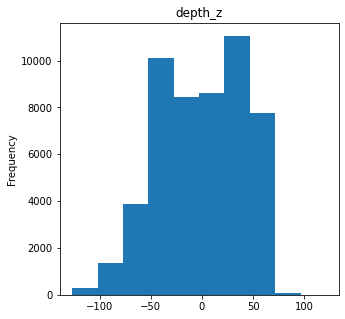

In [51]:
num_col=[]
cat_col=[]
for col in data.columns:
    plt.figure(col, figsize=(5,5))
    plt.title(col)
    if is_numeric_dtype(data[col]):
        data[col].plot(kind="hist")
        num_col.append(col)
    if is_string_dtype(data[col]):
        sns.countplot(x=col, data=data, order=data[col].value_counts().index)
        plt.show()
        cat_col.append(col)

### Como vamos utilziar regressão devemos transformas as variaveis de categoricas para numericas

In [52]:
for i in cat_col:
    data[i]=data().fit_transform(data[i])
print(data.head())

   carat  cut  color  clarity   depth   table  price      x      y      z  \
0  114.0    4      5        1  7235.0  4230.0   20.0  811.0  817.0  644.0   
1  104.0    3      5        2  7035.0  4692.0   20.0  798.0  788.0  612.0   
3  144.0    3      1        3  7341.0  4461.0   21.0  862.0  868.0  697.0   
4  154.0    1      0        1  7447.0  4461.0   21.0  891.0  893.0  729.0   
5  119.0    2      0        5  7388.0  4384.0   21.0  809.0  813.0  657.0   

      table_xy    depth_z  
0  1036.549639  66.359088  
1   990.011039  77.666088  
3   870.776639  51.692088  
4   806.222639  41.729088  
5  1011.867839  60.060088  


Distribuição de valores de Preços

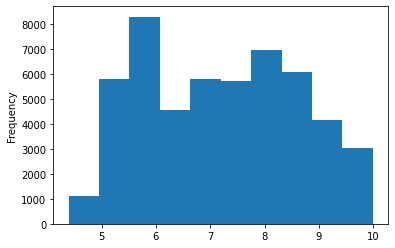

In [53]:
data["log_price"]=np.log2(data["price"]+1)
data["log_price"].plot(kind="hist")

### Analise de Correlação

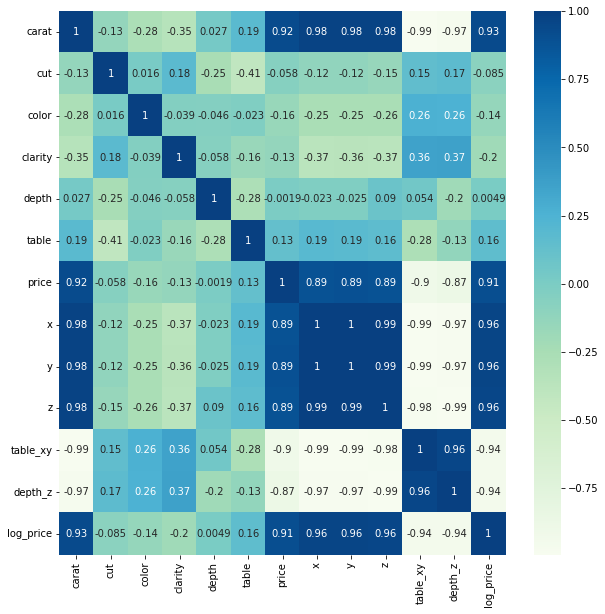

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="GnBu")
plt.show()

### Abaixo estão os atributos com mais de 50% de correlação

In [55]:
# Next, Get the variables which has correlation more than 50%
diamond_corr=data.corr()[["log_price"]]
diamond_corr_hi=diamond_corr.loc[diamond_corr["log_price"]>0.5]
print(diamond_corr_hi)

           log_price
carat       0.931003
price       0.907942
x           0.961694
y           0.962143
z           0.958906
log_price   1.000000


### Buscando por multicolinearidade

In [56]:
X=data[['carat','cut','color','clarity', 'x','y','z', 'table', 'depth']]
#VIF DataFrame

vif_data=pd.DataFrame()
vif_data['features']=X.columns

#calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,carat,128.610656
1,cut,11.926322
2,color,5.689119
3,clarity,5.543326
4,x,13615.173569
5,y,11572.010189
6,z,5575.561623
7,table,996.507428
8,depth,1492.813962


## Inicio da implementação do modelo

In [57]:
y=data['log_price'] #Dependent variable
X=data[['carat','color','clarity', 'cut','x','y','z', 'table', 'depth']] #independent variable

# Next, we devide our dataset into training and testing datasets, in 70 and 30 ratio.
# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3) 

### Treinando o modelo

Regressão Linear

In [58]:
lr=LinearRegression(normalize=True) 
lr.fit(X_train, y_train) 

coeffecients = pd.DataFrame(lr.coef_,X_train.columns)
coeffecients.columns = ['Coeffecient']
print("Intercept value is {}".format(lr.intercept_))
coeffecients

Intercept value is -8.13963648753174


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,Coeffecient
carat,-0.003090
color,0.112217
clarity,0.172063
cut,0.036276
x,0.005159
y,0.002592
z,0.002722
table,0.000188
depth,0.000430


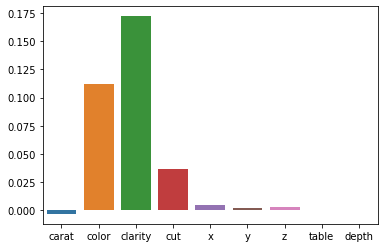

In [59]:
sns.barplot(x=X_train.columns, y=lr.coef_)

In [60]:
pred=lr.predict(X_test)

Mean Square Error: Erro para cada conjunto x - x', sendo x o previsto e x' o predito, onde o Mean Square Error = (x - x')**2

Root Mean Square Error: np.sqrt(Mean Square Error)
​
​R Square: Pode ser vista como a distancia entre a "curva" da regressão e os valores reais


Mean Square Error: 0.04209241766750902
 Root Mean Square Error: 0.20516436744110567
R Square: 0.9787385471749861


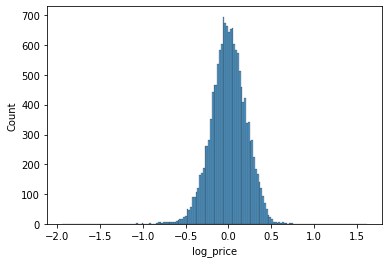

In [61]:
plt.figure()
sns.histplot((y_test-pred))

# MAE, MSE, RMSE & R-square
lr_rsquare=metrics.r2_score(y_test, pred)
#print('Mean Square Error:',metrics.mean_absolute_error(y_test, pred))
print('Mean Square Error:',metrics.mean_squared_error(y_test, pred))
print(' Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R Square:', metrics.r2_score(y_test,pred))

### Validação do modelo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


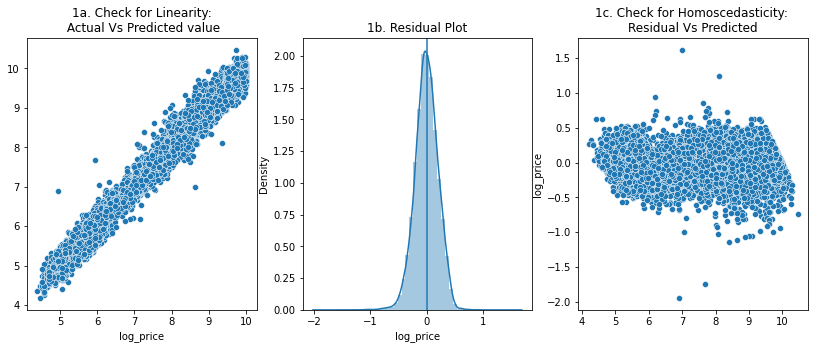

In [62]:
#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, pred)
#plt.hlines(y=0, xmin= -1000, xmax=5000)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-pred)
ax.axvline((y_test-pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=pred, y=(y_test-pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

### Regressão Ridge

Adiciona um termo de penalização para evitar overfitting

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 

Mean Squared Error: 0.05832176533212648
 Root Mean Squared Error: 0.24149899654476098
R Squared: 0.9705408828716985


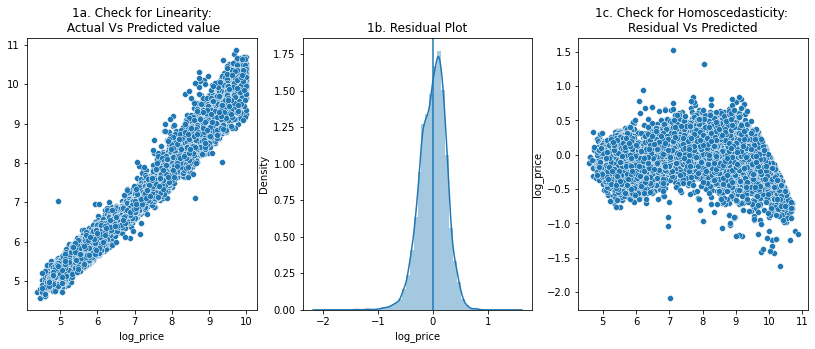

In [63]:
ridgeReg=Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train, y_train)
rid_pred=ridgeReg.predict(X_test)
rid_rsquare=metrics.r2_score(y_test, rid_pred)
print('Mean Squared Error:',metrics.mean_squared_error(y_test, rid_pred))
print(' Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, rid_pred)))
print('R Squared:', metrics.r2_score(y_test,rid_pred))

#plotting

#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, rid_pred)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-rid_pred)
ax.axvline((y_test-rid_pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=rid_pred, y=(y_test-rid_pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

### Regressão Elasticnet

Adiciona dupla penalização, um metodo hibrido entre o Ridge e o Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+02, tolerance: 7.151e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passin

Mean Squared Error: 0.043450841834377696
 Root Mean Squared Error: 0.20844865515128108
R Squared: 0.9780523886471396


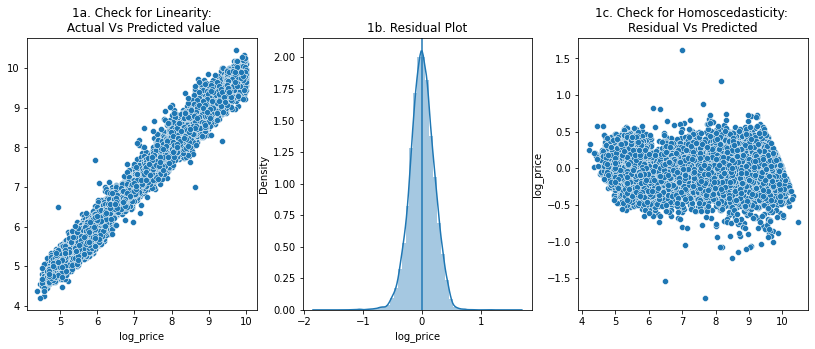

In [64]:
ENReg=ElasticNet(alpha=0.05, l1_ratio=0.5, normalize=False)
ENReg.fit(X_train, y_train)
EN_pred=ENReg.predict(X_test)
EN_rsquare=metrics.r2_score(y_test, EN_pred)
print('Mean Squared Error:',metrics.mean_squared_error(y_test, EN_pred))
print(' Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, EN_pred)))
print('R Squared:', metrics.r2_score(y_test,EN_pred))

#Plotting

#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, EN_pred)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-EN_pred)
ax.axvline((y_test-EN_pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=EN_pred, y=(y_test-EN_pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

### Regressão Floresta Aleatoria 

Utiliza uma serie de arvores de decisão para predizer um resultado

 Mean Squared Error:  0.015167462601329666
 Root Mean Squared Error: 0.12315625279022445
R2 Square:  0.9923387082889692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


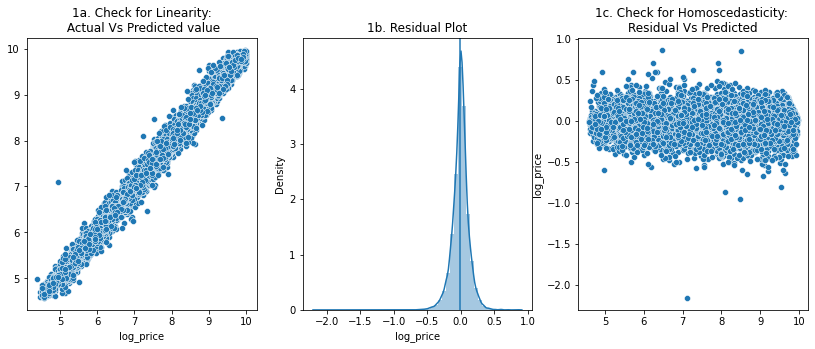

In [65]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred=rf_model.predict(X_test)
rf_rsquare=metrics.r2_score(y_test, rf_y_pred)
print(" Mean Squared Error: ", metrics.mean_squared_error(y_test,rf_y_pred))
print(" Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred)))
print("R2 Square: ", metrics.r2_score(y_test, rf_y_pred))

#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, rf_y_pred)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-rf_y_pred)
ax.axvline((y_test-rf_y_pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=rf_y_pred, y=(y_test-rf_y_pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

Comparação dos Metodos

In [66]:
pd.DataFrame(({'R-Squared %':[round(lr_rsquare*100),round(rid_rsquare*100),round(EN_rsquare*100), round(rf_rsquare*100)]}), index=['Linear Regression','Ridge Regression','Elastic Net','RandomForest Regression'])

,R-Squared %
Linear Regression,98
Ridge Regression,97
Elastic Net,98
RandomForest Regression,99
